## Clustering

In unsupervised learning, labels are either not available or are not used for learning. Clustering is a form of
unsupervised learning whereby, without labels, the data is characterized by constraints alone. LTN can formulate
such constraints, such as for example:
- clusters should be disjoint;
- every example should be assigned to a cluster;
- a cluster should not be empty;
- if the points are near, they should belong to the same cluster;
- if the points are far, they should belong to different clusters, etc.

For this specific task, LTN uses the following language and grounding:

**Domains:**
- $points$, denoting the data for which we have to create clusters;
- $clusters$, denoting the clusters;
- $thresholds$, denoting the thresholds for deciding whether to points are near each other or far from each other.

**Variables:**
- $x, y$ for all the points;
- $D(x) = D(y) = points$;
- $D(c) = clusters$.

**Constants:**
- $th_{close}$: the threshold under which we decide that two points are near each other;
- $th_{distant}$: the threshold over which we decide that two points are far from each other;
- $D(th_{close}) = D(th_{distant}) = thresholds$.

**Predicates:**
- $C(x, c)$: it can be interpreted as the probability that a given point $c$ belongs to a cluster $c$;
- $D_{in}(C) = points, clusters$.

**Axioms:**

- $\forall x \text{ } \exists c \text{ } C(x, c)$: each point $x$ should be assigned to some cluster $c$;
- $\forall x \text{ } \exists c \text{ } C(x, c)$: each cluster $c$ should have at least one point $x$ inside;
- $\forall(c,x,y : dist(x, y) < th_{close}) \text{ } (C(x,c) \leftrightarrow C(y,c))$: if two points $x$ and $y$ are closed
to each other, they should belong to the same cluster $c$;
- $\forall(c,x,y : dist(x, y) > th_{distant}) \text{ } \lnot(C(x,c) \land C(y,c))$: if two points $x$ and $y$ are far, they should
not belong to the same cluster $c$.

Notice the use of guarded quantifiers: all the pairs of points with Euclidean distance ($dist$) lower (resp. higher) than a value
$th_{close}$ (resp. $th_{distant}$) should belong to the same cluster (resp. should not).

$th_{close}$ and $th_{distant}$ are arbitrary threshold values that define some of the closest and most distant pairs of
points. In our example, they are set to 0.2 and 1.0, respectively.

The clustering predicate has mutually-exclusive probabilities for each cluster using a *softmax* layer. Therefore, there
is no explicit constraint about clusters being disjoint.

**Grounding:**
- $\mathcal{G}(points)=[-1, 1]^{2}$: the dataset has points in $[-1, 1]^{2}$;
- $\mathcal{G}(clusters)=\mathbb{N}^4$: we use one-hot vectors to represent the labels of 4 clusters (we assume there are
only 4 clusters in the data);
- $\mathcal{G}(x) \in [-1,1]^{m \times 2}, that is, $x$ is a sequence of $m$ points. $\mathcal{G}(x) = \mathcal{G}(y)$;
- $\mathcal{G}(c) = \langle[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1] \rangle$;
- $\mathcal{G}(th_{close}) = 0.2$;
- $\mathcal{G}(th_{distant}) = 1.0$;
- $\mathcal{G}(C \mid \theta): x,c \mapsto c^\top \cdot \operatorname{softmax}\left(\operatorname{MLP}_{\theta}(x)\right)$,
where $MLP_{\theta}$ is a Multi-Layer Perceptron with 4 output neurons corresponding to the 4 clusters.

### Dataset

Now, let's create our toy dataset.

Ground-truth data for this task is generated artificially by creating 4 centers, and generating 50 random samples
from a multivariate Gaussian distribution around each center.

After the generation, we plot our dataset. It is possible to observe that our procedure has created 4 distinct clusters, that
are denoted in the plot with 4 different colors.

### 聚类

在无监督学习中，标签要么不可用，要么不用于学习。聚类是一种无监督学习的形式，通过仅依靠约束来描述数据而无需标签。LTN（逻辑张量网络）可以表达这样的约束，例如：
- 聚类应该是互斥的；
- 每个样本都应该分配到某个聚类中；
- 一个聚类不应为空；
- 如果点靠近，它们应该属于同一个聚类；
- 如果点距离较远，它们应该属于不同的聚类，等等。

对于这个特定任务，LTN 使用以下语言和基础：

**域：**
- $points$，表示我们需要创建聚类的数据；
- $clusters$，表示聚类；
- $thresholds$，表示用于判断点之间是接近还是远离的阈值。

**变量：**
- $x, y$ 表示所有的点；
- $D(x) = D(y) = points$；
- $D(c) = clusters$。

**常量：**
- $th_{close}$：用于判断两个点接近的阈值；
- $th_{distant}$：用于判断两个点远离的阈值；
- $D(th_{close}) = D(th_{distant}) = thresholds$。

**谓词：**
- $C(x, c)$：可以解释为点 $x$ 属于聚类 $c$ 的概率；
- $D_{in}(C) = points, clusters$。

**公理：**
- $\forall x \text{ } \exists c \text{ } C(x, c)$：每个点 $x$ 都应分配到某个聚类 $c$；
- $\forall c \text{ } \exists x \text{ } C(x, c)$：每个聚类 $c$ 都应该至少包含一个点 $x$；
- $\forall(c,x,y : dist(x, y) < th_{close}) \text{ } (C(x,c) \leftrightarrow C(y,c))$：如果两个点 $x$ 和 $y$ 彼此接近，它们应属于同一个聚类 $c$；
- $\forall(c,x,y : dist(x, y) > th_{distant}) \text{ } \lnot(C(x,c) \land C(y,c))$：如果两个点 $x$ 和 $y$ 彼此远离，它们不应属于同一个聚类 $c$。

注意使用了守卫量词：所有欧几里得距离（$dist$）小于（或大于）阈值 $th_{close}$（或 $th_{distant}$）的点对应该属于同一个聚类（或不属于同一个聚类）。

$th_{close}$ 和 $th_{distant}$ 是定义最近和最远点对的任意阈值。在我们的示例中，它们分别设置为 0.2 和 1.0。

聚类谓词对每个聚类使用了互斥概率，通过 *softmax* 层实现。因此，没有显式的关于聚类互斥的约束。

**基础：**
- $\mathcal{G}(points)=[-1, 1]^{2}$：数据集中的点位于 $[-1, 1]^{2}$ 范围内；
- $\mathcal{G}(clusters)=\mathbb{N}^4$：我们使用独热向量来表示 4 个聚类的标签（假设数据中只有 4 个聚类）；
- $\mathcal{G}(x) \in [-1,1]^{m \times 2}$，即 $x$ 是 $m$ 个点的序列。$\mathcal{G}(x) = \mathcal{G}(y)$；
- $\mathcal{G}(c) = \langle[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1] \rangle$；
- $\mathcal{G}(th_{close}) = 0.2$；
- $\mathcal{G}(th_{distant}) = 1.0$；
- $\mathcal{G}(C \mid \theta): x,c \mapsto c^\top \cdot \operatorname{softmax}\left(\operatorname{MLP}_{\theta}(x)\right)$，其中 $MLP_{\theta}$ 是一个具有 4 个输出神经元的多层感知器，对应于 4 个聚类。

### 数据集

现在，我们来创建我们的玩具数据集。

此任务的真实数据通过创建 4 个中心，并在每个中心周围从多变量高斯分布中生成 50 个随机样本来人工生成。

生成后，我们绘制数据集。可以看到，我们的程序创建了 4 个不同的聚类，这些聚类在图中用 4 种不同的颜色表示。

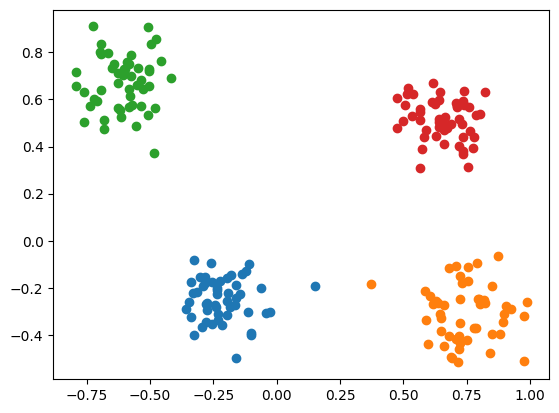

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt

nr_of_clusters = 4
nr_of_points_x_cluster = 50

close_threshold = 0.2
distant_threshold = 1.0

margin = .2
mean = [np.random.uniform([-1 + margin, -1 + margin], [0 - margin, 0 - margin], 2),
        np.random.uniform([0 + margin, -1 + margin], [1 - margin, 0 - margin], 2),
        np.random.uniform([-1 + margin, 0 + margin], [0 - margin, 1 - margin], 2),
        np.random.uniform([0 + margin, 0 + margin], [1 - margin, 1 - margin], 2)]

cov = np.array([[[.01, 0], [0, .01]]] * nr_of_clusters)

cluster_data = {}
for i in range(nr_of_clusters):
    cluster_data[i] = np.random.multivariate_normal(mean=mean[i], cov=cov[i], size=nr_of_points_x_cluster)

data = np.concatenate([cluster_data[i] for i in range(nr_of_clusters)]).astype(np.float32)

for i in range(nr_of_clusters):
    plt.scatter(cluster_data[i][:, 0], cluster_data[i][:, 1])

### LTN setting

In order to define our knowledge base (axioms), we need to define predicate $C$, variables $x,y,c$, constant $th_{close}$ and
$th_{distant}$,
connectives, quantifiers, the `SatAgg` operator, and a lambda function $dist$ which computes the Euclidean distance
between two points $x$ and $y$.

For the connectives and quantifiers, we use the stable product configuration (seen in the tutorials).

For predicate $C$, we use a simple $MLP$ with three hidden layers and 4 output units.

Variable $c$ is a sequence of the cluster classes, while variables $x$ and $y$ are sequences of data points in the dataset.

`SatAgg` is defined using the `pMeanError` aggregator.

### LTN 设置

为了定义我们的知识库（公理），我们需要定义谓词 $C$、变量 $x, y, c$、常量 $th_{close}$ 和 $th_{distant}$、连接词、量词、`SatAgg` 操作符，以及一个计算两点 $x$ 和 $y$ 之间欧几里得距离的 lambda 函数 $dist$。

对于连接词和量词，我们使用稳定乘积配置（在教程中见过）。

对于谓词 $C$，我们使用一个简单的包含三个隐藏层和 4 个输出单元的 $MLP$。

变量 $c$ 是一个聚类类别的序列，而变量 $x$ 和 $y$ 是数据集中数据点的序列。

`SatAgg` 使用 `pMeanError` 聚合器定义。

In [12]:
import ltn

# we define predicate C # 我们定义谓词C
class MLP(torch.nn.Module):
    """
    Here, the problem of clustering is organized as a classification task, where the classifier outputs the probability
    that the point given in input belongs to a specific cluster. The clusters are the classes of the classification problem.
    在这里，聚类问题被组织成一个分类任务，其中分类器输出输入点属于特定聚类的概率。这些聚类是分类问题的类别。
    """
    def __init__(self, layer_sizes=(2, 16, 16, 16, 4)):
        super(MLP, self).__init__()
        self.elu = torch.nn.ELU()
        self.softmax = torch.nn.Softmax(dim=1)
        self.linear_layers = torch.nn.ModuleList([torch.nn.Linear(layer_sizes[i - 1], layer_sizes[i])
                                                  for i in range(1, len(layer_sizes))])

    def forward(self, x, c):
        """
        Given a point x and a cluster c, the forward phase of this MLP returns the probability that the point x belongs to cluster c.

        :param x: point that has to be assigned to a cluster
        :param c: cluster for which we want to compute the probability
        :return: the probability that point x belong to cluster c
        给定一个点 x 和一个聚类 c，该 MLP 的前向传播阶段返回点 x 属于聚类 c 的概率。
    
        :param x: 需要分配到某个聚类的点
        :param c: 我们想要计算点 x 属于该聚类的概率
        :return: 点 x 属于聚类 c 的概率
        """
        for layer in self.linear_layers[:-1]:
            x = self.elu(layer(x))
        x = self.softmax(self.linear_layers[-1](x))
        out = torch.sum(x * c, dim=1)
        return out

# C = ltn.Predicate(MLP()) # 原来的代码会报错
C = ltn.Predicate(MLP().to(ltn.device))

# we define the variables # 我们定义变量
c = ltn.Variable("c", torch.tensor([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]))
x = ltn.Variable("x", torch.tensor(data))
y = ltn.Variable("y", torch.tensor(data))

# we define the constants # 我们定义常量
th_close = ltn.Constant(torch.tensor(close_threshold))
th_distant = ltn.Constant(torch.tensor(distant_threshold))

# we define connectives, quantifiers, and the SatAgg operator # 我们定义连接词、量词和SatAgg运算符
And = ltn.Connective(ltn.fuzzy_ops.AndProd())
Not = ltn.Connective(ltn.fuzzy_ops.NotStandard())
Equiv = ltn.Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.AndProd(), ltn.fuzzy_ops.ImpliesReichenbach()))
Exists = ltn.Quantifier(ltn.fuzzy_ops.AggregPMean(p=1), quantifier="e")
Forall = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=4), quantifier="f")
SatAgg = ltn.fuzzy_ops.SatAgg()

# lambda function for Euclidean distance # 欧几里得距离的lambda函数
dist = lambda x, y: torch.unsqueeze(torch.norm(x - y, dim=1), dim=1)

### Learning

Let us define $D$ the data set of all examples. The objective function with $\mathcal{K}$
is given by $\operatorname{SatAgg}_{\phi \in \mathcal{K}} \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{D}}(\phi)$.

In practice, the optimizer uses the following loss function:

$\boldsymbol{L}=\left(1-\underset{\phi \in \mathcal{K}}{\operatorname{SatAgg}} \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{B}}(\phi)\right)$

where $B$ is a mini batch sampled from $D$.

In the following, we learn our LTN in the clustering task using the satisfaction of the knowledge base as
an objective. In other words, we want to learn the parameters $\theta$ of predicate $C$ in such a way the
axioms in the knowledge base are maximally satisfied.

We train our model for 1000 epochs and use the `Adam` optimizer.
In particular, for $\forall$ we use `pMeanError` with $p=4$, while for $\exists$ we use `pMean` with $p=1$ in the first
100 epochs and $p=6$ thereafter.

### 学习

让我们定义 $D$ 为所有样本的数据集。目标函数 $\mathcal{K}$ 表示为 $\operatorname{SatAgg}_{\phi \in \mathcal{K}} \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{D}}(\phi)$。

在实践中，优化器使用以下损失函数：

$$
\boldsymbol{L}=\left(1-\underset{\phi \in \mathcal{K}}{\operatorname{SatAgg}} \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{B}}(\phi)\right)
$$

其中 $B$ 是从 $D$ 中抽取的一个小批量。

接下来，我们在聚类任务中通过知识库的满意度来学习我们的 LTN。换句话说，我们希望学习谓词 $C$ 的参数 $\theta$，使得知识库中的公理得到最大程度的满足。

我们将模型训练 1000 个周期，并使用 `Adam` 优化器。
特别地，对于 $\forall$，我们在前 100 个周期内使用 $p=4$ 的 `pMeanError`，而对于 $\exists$，我们在前 100 个周期内使用 $p=1$ 的 `pMean`，之后使用 $p=6$。

In [13]:
optimizer = torch.optim.Adam(C.parameters(), lr=0.001)

for epoch in range(1000):
    if epoch <= 100:
        p_exists = 1
    else:
        p_exists = 6
    optimizer.zero_grad()
    sat_agg = SatAgg(
        Forall(x, Exists(c, C(x, c), p=p_exists)),
        Forall(c, Exists(x, C(x, c), p=p_exists)),
        Forall([c, x, y], Equiv(C(x, c), C(y, c)),
               cond_vars=[x, y],
               cond_fn=lambda x, y: torch.lt(dist(x.value, y.value), th_close.value)),
        Forall([c, x, y], Not(And(C(x, c), C(y, c))),
               cond_vars=[x, y],
               cond_fn=lambda x, y: torch.gt(dist(x.value, y.value), th_distant.value))
    )
    loss = 1. - sat_agg
    loss.backward()
    optimizer.step()

    # we print metrics every 100 epochs of training # 我们每100个epoch打印一次指标
    if epoch % 100 == 0:
        print(" epoch %d | loss %.4f | Train Sat %.3f " % (epoch, loss, sat_agg))

 epoch 0 | loss 0.5587 | Train Sat 0.441 
 epoch 100 | loss 0.5578 | Train Sat 0.442 
 epoch 200 | loss 0.4552 | Train Sat 0.545 
 epoch 300 | loss 0.3703 | Train Sat 0.630 
 epoch 400 | loss 0.3677 | Train Sat 0.632 
 epoch 500 | loss 0.3182 | Train Sat 0.682 
 epoch 600 | loss 0.2869 | Train Sat 0.713 
 epoch 700 | loss 0.2860 | Train Sat 0.714 
 epoch 800 | loss 0.2855 | Train Sat 0.715 
 epoch 900 | loss 0.2851 | Train Sat 0.715 


Notice that in this example we do not have a data loader like in previous examples. In fact, variables $x$ and $y$ are
grounded with the entire dataset just one time before the beginning of the training.

Notice also that `SatAgg` takes as input the four axioms we have specified above and returns a truth value which can be
interpreted as the satisfaction level of the entire knowledge base.

Note that after 500 epochs of training the satisfaction level of the knowledge base is around 0.8. This shows
the power of LTN in learning the clustering task only using the satisfaction of a knowledge base as an objective.

In the following, we plot the truth values of predicate $C$ for all the possible pairs $(x_i, c_j)$, where $x_i$ is a data
point of the dataset and $c_j$ is the label of some cluster. It is possible to
observe that LTN has learned how to perform the clustering perfectly.

However, it is important to note that this is a really simplified example which is far from a real clustering problem where
clusters could potentially be overlapping. Also, note that in this example we knew there were 4 clusters since we have crated
the dataset by our own. In real clustering problems, the number of cluster is a hyper-parameter of the clustering algorithm.


注意，在这个例子中，我们没有像之前的例子那样使用数据加载器。实际上，变量 $x$ 和 $y$ 在训练开始前只用整个数据集进行了一次初始化。

还要注意的是，`SatAgg` 接受我们上面指定的四个公理作为输入，并返回一个真值，该真值可以解释为整个知识库的满足度水平。

请注意，经过500个周期的训练后，知识库的满足度水平大约为0.8。这表明 LTN 仅使用知识库的满足度作为目标，就能够成功地学习聚类任务。

接下来，我们绘制了谓词 $C$ 对所有可能的 $(x_i, c_j)$ 对的真值，其中 $x_i$ 是数据集中的数据点，$c_j$ 是某个聚类的标签。可以观察到，LTN 完美地学习了如何执行聚类。

然而，重要的是要注意，这实际上是一个非常简化的示例，远非真实的聚类问题，在真实问题中，聚类可能会重叠。此外，请注意，在这个例子中，我们知道有4个聚类，因为我们自己创建了这个数据集。在真实的聚类问题中，聚类的数量是聚类算法的一个超参数。

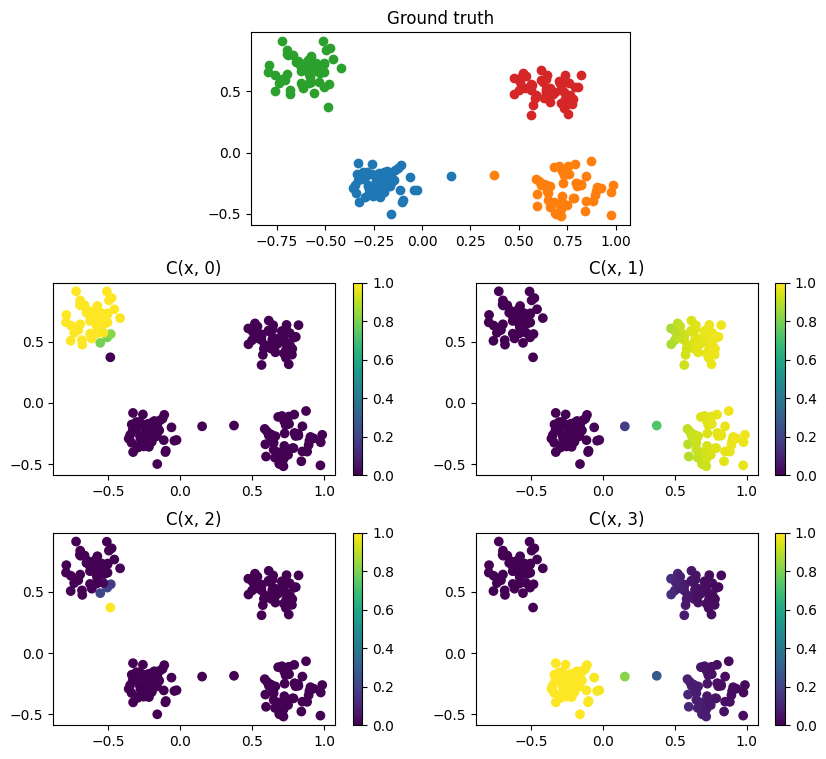

In [17]:
# graphical visualization of the results # 结果的图形化可视化

x0 = data[:, 0]
x1 = data[:, 1]

cluster_labels = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]

# prC = [C.model(torch.tensor(data), torch.tensor([i] * len(data))).detach().numpy()
#        for i in cluster_labels] # 原来的代码会报错
prC = [C.model(torch.tensor(data).to(ltn.device), torch.tensor([i] * len(data)).to(ltn.device)).detach().cpu().numpy() for i in cluster_labels]
n = 2
m = (nr_of_clusters + 1) // n + 1

fig = plt.figure(figsize=(10, m * 3))

plt.subplots_adjust(wspace=0.2, hspace=0.3)
ax = plt.subplot2grid((m, 8), (0, 2), colspan=4)
ax.set_title("Ground truth")
for i in range(nr_of_clusters):
    ax.scatter(cluster_data[i][:, 0], cluster_data[i][:, 1])

for i in range(nr_of_clusters):
    fig.add_subplot(m, n, i + 3)
    plt.title("C(x, "+ str(i) +")")
    plt.scatter(x0, x1, c=prC[i], vmin=0, vmax=1)
    plt.colorbar()

plt.show()